# Imports

In [1]:
# current filepath system leaves plenty to be desired
import sys
local_path = '/Users/hinzlehome/codeup-data-science/binance-project/'
sys.path.insert(0, local_path)

# imports.py in /utils/
from utils.imports import *

# plotting magic
%matplotlib inline
# plotting defaults
plt.rc('figure', figsize=(16, 9))
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=16)
# plt.style.available
# ^^^ show available seaborn styles

# !!! Warning !!! 
# *** no more warnings ***
# import warnings
# warnings.filterwarnings("ignore")

# custom mods
from utils.tidy import *
from utils.model import *


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
train,validate,test=btcusd()

cached csv


In [3]:
train.head()

,open_time,open,high,low,close,volume,quote_asset,number_of_trades,taker_buy_base_asset_vol,taker_buy_quote_asset_vol
close_time,,,,,,,,,,
2022-04-25 03:34:59.999,1650857640000,39241.39,39247.11,39241.03,39241.03,0.034305,1346.2987,5,0.032395,1271.3484
2022-04-25 03:35:59.999,1650857700000,39239.88,39272.32,39239.88,39246.41,2.441750,95844.1921,65,1.473456,57836.1693
2022-04-25 03:36:59.999,1650857760000,39245.53,39249.18,39230.06,39232.18,0.103794,4072.9587,24,0.052915,2076.4194
2022-04-25 03:37:59.999,1650857820000,39233.21,39238.46,39232.93,39232.93,0.019871,779.6247,8,0.007287,285.9047
2022-04-25 03:38:59.999,1650857880000,39232.49,39248.38,39232.20,39238.10,0.056483,2216.3283,13,0.048939,1920.2979


# Making Modeling

In [4]:
def split_plot(train,validate,test,col='close'):
    plt.figure(figsize=(16,9))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col+' price')
    plt.xlabel(col+' time')
    plt.title('btcusd 1m kline, close price')
    plt.show()

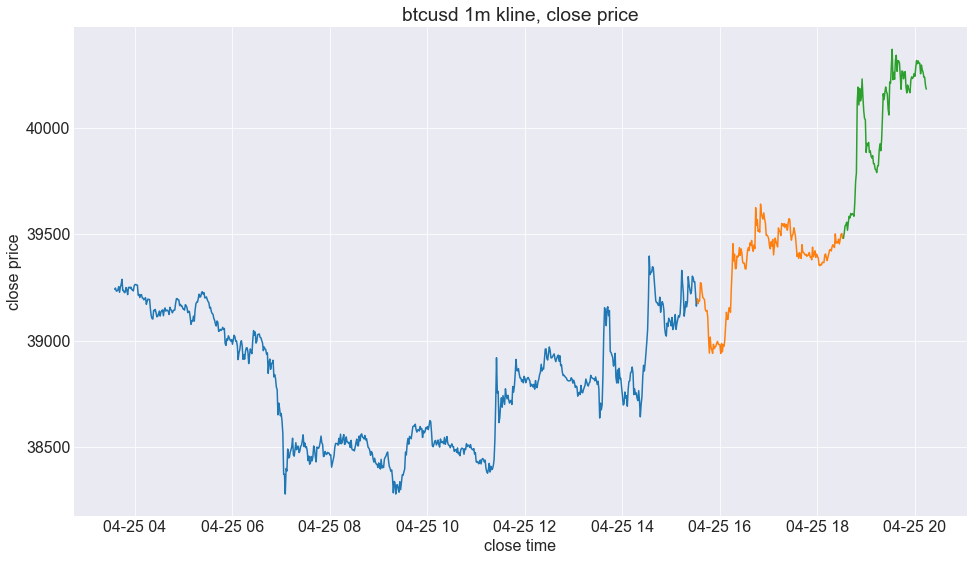

In [5]:
split_plot(train,validate,test)

# Facebook Prophet Forecasting Procedure

In [6]:
def fbp_clean(df):
	'''
	takes in binance candlestick data and cleans it for facebook prophet. df must have datetime index and a column labled "close". helps if "close" has close prices for a crypto trading pair.
	'''
	df=df.close
	df=df.reset_index()
	df=df.rename(columns={'close':'y','close_time':'ds'})
	df.ds=df.ds.dt.to_period('S')
	df.ds=df.ds.astype(str)
	df.ds=pd.to_datetime(df.ds)
	return df

In [7]:
df=fbp_clean(train)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      718 non-null    datetime64[ns]
 1   y       718 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.3 KB


In [9]:
df.head()

,ds,y
0,2022-04-25 03:34:59,39241.03
1,2022-04-25 03:35:59,39246.41
2,2022-04-25 03:36:59,39232.18
3,2022-04-25 03:37:59,39232.93
4,2022-04-25 03:38:59,39238.10


In [10]:
from prophet import Prophet


In [11]:
m = Prophet()
# make the thing

m.fit(df)
# fit the thing

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3944.66    0.00342503       3146.01           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4009.77    0.00141125       3195.02      0.5657      0.5657      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4035.96   0.000363176       857.123           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4039.12   0.000129785       770.614           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4047.39   0.000556825       8767.76      0.2993           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [15]:
val=fbp_clean(validate)

# set up the dataframe for predictions

In [18]:
future=val.drop('y',axis=1)

In [19]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
176,2022-04-25 18:27:59,39826.916052,37217.788211,42139.998519
177,2022-04-25 18:28:59,39830.325926,37206.310959,42116.551487
178,2022-04-25 18:29:59,39833.735800,37136.589422,42199.599565
179,2022-04-25 18:30:59,39837.145674,37124.671696,42207.905023
180,2022-04-25 18:31:59,39840.555548,37144.379222,42237.855183


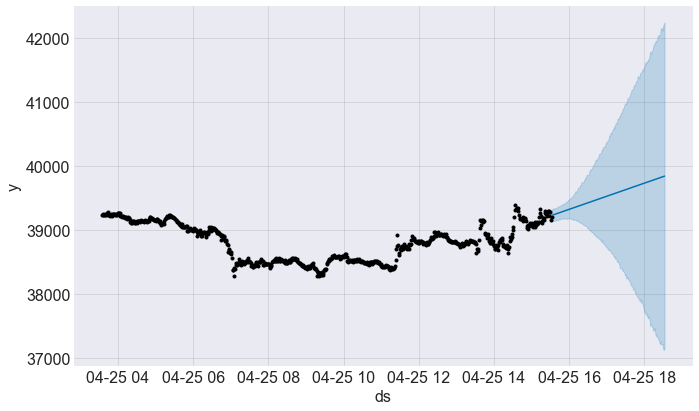

In [20]:
fig1 =m.plot(forecast)